In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data generation
np.random.seed(0)
torch.manual_seed(0)
x = np.random.uniform(-1, 1, size=(100, 1))
y = np.abs(x)

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [3]:
neurons = 3

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, neurons)
        self.fc2 = nn.Linear(neurons, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # You can adjust the negative_slope as needed

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))  # Hidden layer with Leaky ReLU activation
        x = self.fc2(x)                  # Output layer
        return x

In [5]:
def train_model(x_tensor, y_tensor):
    model = SimpleNN()

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.1)

    # Early stopping parameters
    patience = 5000
    best_loss = float('inf')
    counter = 0

    # Training loop
    num_epochs = 100000
    for epoch in range(num_epochs):
        model.train()
        
        # Forward pass
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            counter = 0  # Reset counter if the loss improves
        else:
            counter += 1
        
        if counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break
    
    return model

Early stopping at epoch 6303


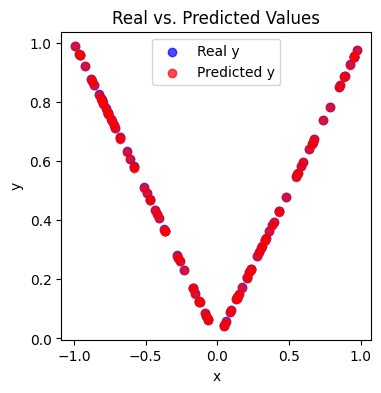

In [6]:
# Test the model
model = train_model(x_tensor, y_tensor)
model.eval()
with torch.no_grad():
    test_y = model(x_tensor).numpy()  # Convert to numpy array for plotting

# Plot the results (x1, y) and (x1, test_y)
plt.figure(figsize=(4, 4))
plt.scatter(x, y_tensor.numpy(), label='Real y', color='blue', alpha=0.7)  # Plot real y
plt.scatter(x, test_y, label='Predicted y', color='red', alpha=0.7)        # Plot predicted y
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real vs. Predicted Values')
plt.legend()
plt.show()

In [7]:
# Print all parameters with names
for name, param in model.named_parameters():
    print(f"Parameter name: {name} \t Parameter value: {param.data.numpy()}")

Parameter name: fc1.weight 	 Parameter value: [[ 0.0022072]
 [ 1.6209242]
 [-1.6648744]]
Parameter name: fc1.bias 	 Parameter value: [-0.00306153 -0.07007299 -0.07195473]
Parameter name: fc2.weight 	 Parameter value: [[0.00238791 0.62266374 0.60622597]]
Parameter name: fc2.bias 	 Parameter value: [0.04354465]
